In [206]:
#get libraries
import numpy as np
import pandas as pd

# NLP libraries
import nltk 
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Model libraries
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [164]:
data_chatbot = pd.read_csv("deepnlp/Sheet_1.csv")
data_chatbot = data_chatbot.dropna(axis='columns',how='any')
data_resume = pd.read_csv("deepnlp/Sheet_2.csv",encoding = "ISO-8859-1" )
data_chatbot.head()
data_resume.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [107]:
print("Shape of Chatbot data",data_chatbot.shape)
print("Shape of Resume data",data_resume.shape)

Shape of Chatbot data (80, 3)
Shape of Resume data (125, 3)


Count of Chatabox class 
 not_flagged    55
flagged        25
Name: class, dtype: int64


Count of Resume class 
 not_flagged    92
flagged        33
Name: class, dtype: int64


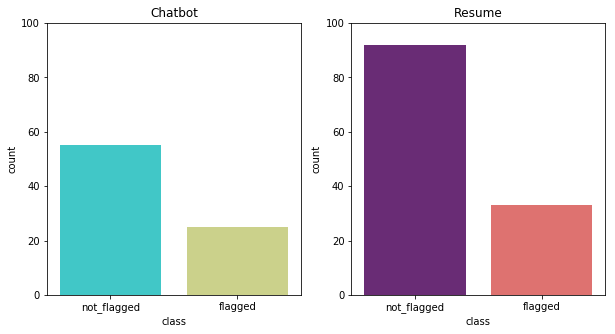

In [119]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize = (10,5))
sns.countplot(x='class',data= data_chatbot,palette='rainbow', ax = axs[0]).set_title('Chatbot')
sns.countplot(x='class',data= data_resume,palette='magma',ax = axs[1]).set_title('Resume')
axs[0].set_ylim(0,100)
axs[1].set_ylim(0,100)

print("Count of Chatabox class \n",data_chatbot['class'].value_counts())
print("\n")
print("Count of Resume class \n",data_resume['class'].value_counts())


Wordcloud for Chatbot data 



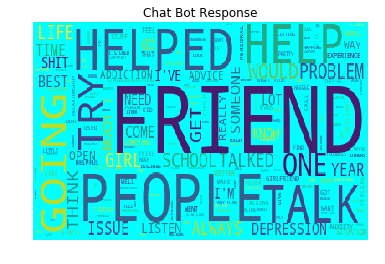

In [167]:
def word_cloud(text):
    wordcloud = WordCloud(background_color="aqua",
                          stopwords= stopwords.words('english')).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud,aspect='auto')
    plt.axis("off")
    plt.title("Chat Bot Response")

print("Wordcloud for Chatbot data \n")
word_cloud(data_chatbot['response_text'])

Wordcloud for Resume data 



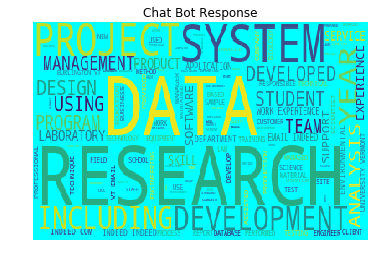

In [169]:
print("Wordcloud for Resume data \n")
word_cloud(data_resume['resume_text'])

### Create a pipeline with the following steps:
    -> CountVectorizer(), 
    -> TfidfTransformer(),
    -> MultinomialNB()


In [220]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])


### Train Test Split on Chatbot & Resume data 


In [196]:
X_chatbot = data_chatbot['response_text']
y_chatbot = data_chatbot['class']
X_train_chatbot, X_test_chatbot, y_train_chatbot, y_test_chatbot = train_test_split(X_chatbot, y_chatbot,
                                                                                    test_size=0.3,random_state=101)

X_resume = data_resume['resume_text']
y_resume = data_resume['class']
X_train_resume, X_test_resume, y_train_resume, y_test_resume = train_test_split(X_resume, y_resume,
                                                                                test_size=0.3,random_state=101)


### Training Chatbot data

In [227]:
# For Random Forest Classifer 
param_grid = {
    'classifier__bootstrap': [True],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__n_estimators': [100, 200, 300,500]
}

# # For Niave Bayes CLassifier 
# param_grid = {  
# #     'vec__max_df': (0.5, 0.625, 0.75, 0.875, 1.0),  
# #     'vec__max_features': (None, 5000, 10000, 20000),  
# #     'vec__min_df': (1, 5, 10, 20, 50),  
# #     'tfidf__use_idf': (True, False),  
# #     'tfidf__sublinear_tf': (True, False),  
# #     'vec__binary': (True, False),  
# #     'tfidf__norm': ('l1', 'l2'),  
#      'classifier__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
#     } 


# Instantiate the grid search model
pipe_grid = GridSearchCV(pipeline, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)


In [228]:
pipe_grid.fit(X_train_chatbot,y_train_chatbot)
#pipeline.fit(X_train_chatbot,y_train_chatbot)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100, total=   0.2s
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s


[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=300, total=   0.8s
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=300, total=   0.8s
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=300, total=   0.8s
[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=300, total=   0.8s
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=500 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=500, total=   1.3s
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_e

[CV] classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=300, total=   0.8s
[CV] classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=300, total=   0.8s
[CV] classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=300, total=   0.8s
[CV] classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500, total=   1.2s
[CV] classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500,

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.8s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'classifier__bootstrap': [True], 'classifier__max_features': ['auto', 'sqrt'], 'classifier__n_estimators': [100, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

### Predictions and Evaluation on Chatbot data 
Now use the pipeline to predict from the X_test and create a classification report and confusion matrix.

In [229]:
#predictions_chatbot = pipeline.predict(X_test_chatbot)
predictions_chatbot = pipe_grid.predict(X_test_chatbot)

print("Confusion Matrix for Chatbot data \n",confusion_matrix(y_test_chatbot,predictions_chatbot))
print("\n")
print("Classification Report for Chatbot data \n",classification_report(y_test_chatbot,predictions_chatbot))
print("\n")
print("Accuracy for Chatbot data \n",accuracy_score(y_test_chatbot,predictions_chatbot))


Confusion Matrix for Chatbot data 
 [[ 3  4]
 [ 0 17]]


Classification Report for Chatbot data 
              precision    recall  f1-score   support

    flagged       1.00      0.43      0.60         7
not_flagged       0.81      1.00      0.89        17

avg / total       0.87      0.83      0.81        24



Accuracy for Chatbot data 
 0.833333333333


### Training on Resume Data

In [230]:
pipe_grid.fit(X_train_resume,y_train_resume)
#pipeline.fit(X_train_resume,y_train_resume)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100 
[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=100, total=   0.4s
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s


[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=300, total=   0.9s
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=300, total=   1.0s
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=300, total=   0.9s
[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=300, total=   1.0s
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=500 
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=auto, classifier__n_estimators=500, total=   1.6s
[CV] classifier__bootstrap=True, classifier__max_features=auto, classifier__n_e

[CV] classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=300, total=   1.0s
[CV] classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=300, total=   1.0s
[CV] classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=300, total=   1.0s
[CV] classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500, total=   1.6s
[CV] classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500 
[CV]  classifier__bootstrap=True, classifier__max_features=sqrt, classifier__n_estimators=500,

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   11.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'classifier__bootstrap': [True], 'classifier__max_features': ['auto', 'sqrt'], 'classifier__n_estimators': [100, 200, 300, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

### Predictions and Evaluation on Chatbot data

In [232]:
predictions_resume = pipe_grid.predict(X_test_resume)

print("Confusion Matrix for Resume data \n",confusion_matrix(y_test_resume,predictions_resume))
print("\n")
print("Classification Report for Resume data \n",classification_report(y_test_resume,predictions_resume))
print("\n")
print("Accuracy for Resume data \n",accuracy_score(y_test_resume,predictions_resume))


Confusion Matrix for Resume data 
 [[ 0  9]
 [ 0 29]]


Classification Report for Resume data 
              precision    recall  f1-score   support

    flagged       0.00      0.00      0.00         9
not_flagged       0.76      1.00      0.87        29

avg / total       0.58      0.76      0.66        38



Accuracy for Resume data 
 0.763157894737


/Users/pchunduru/python_notebooks/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

